In [1]:
import numpy as np
import cv2 as cv
import scipy
import scipy.special
import scipy.spatial
import scipy.stats
import scipy.ndimage
import matplotlib
import matplotlib.patches
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.path import Path

must reshape line from (3, 2) to (1, 3, 1, 2)
must reshape polygon from (5, 2) to (1, 5, 1, 2)


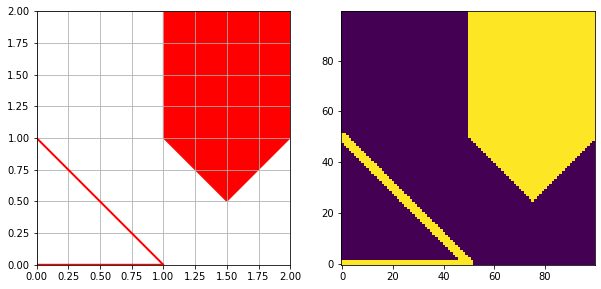

In [2]:
# Polygon/Line to bitmap using opencv2

# Based on:
# https://stackoverflow.com/questions/18632276/how-to-draw-a-line-on-an-image-in-opencv
# API is:
# https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.reshape((-1))

line = np.array([
        [  0, 0],
        [  1, 0],
        [  0, 1]])
poly = np.array([
        [  1, 1],
        [1.5, 0.5],
        [  2, 1],
        [  2, 2],
        [  1, 2]])

patch = matplotlib.patches.Polygon(poly, fill=True, color='r')
axes[0].add_patch(patch)
axes[0].plot(line.T[0], line.T[1], 'r-', linewidth=2)
axes[0].set_xlim([0, 2])
axes[0].set_ylim([0, 2])
axes[0].set_aspect('equal')
axes[0].grid()

N = 100
image = np.zeros((N, N))

r_line = ( (N / 2.)*line ).astype(int)
rz_line = r_line.reshape((-1,1,2))[None]
print("must reshape line from", line.shape, "to", rz_line.shape)
cv.polylines(image, rz_line, False, 1, thickness=2)

# Using cv.line() is not ideal as we must convert numpy to tuple
# cv.line(image, tuple(r_line[0]), tuple(r_line[1]), 1, thickness=2)
# cv.line(image, tuple(r_line[1]), tuple(r_line[2]), 1, thickness=2)

r_poly = ( (N / 2.)*poly ).astype(int)
rz_poly = r_poly.reshape((-1,1,2))[None]
print("must reshape polygon from", poly.shape, "to", rz_poly.shape)
cv.fillPoly(image, rz_poly, 1)

axes[1].imshow(image, origin='lower', interpolation='none')

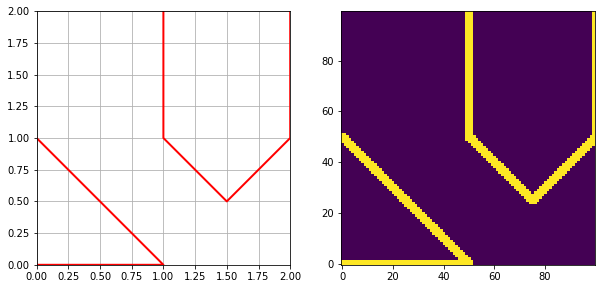

In [3]:
# Lines to bitmap using opencv2
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.reshape((-1))

line1 = np.array([
        [  1, 2],
        [  1, 1],
        [1.5, 0.5],
        [  2, 1],
        [  2, 2]])
line2 = np.array([
        [0, 0],
        [1, 0],
        [0, 1]])

axes[0].plot(line1.T[0], line1.T[1], 'r-', linewidth=2)
axes[0].plot(line2.T[0], line2.T[1], 'r-', linewidth=2)
axes[0].set_xlim([0, 2])
axes[0].set_ylim([0, 2])
axes[0].set_aspect('equal')
axes[0].grid()

N = 100
image = np.zeros((N, N))
r_line1 = ( (N / 2.)*line1 ).astype(int).reshape((-1,1,2))
r_line2 = ( (N / 2.)*line2 ).astype(int).reshape((-1,1,2))
cv.polylines(image, [r_line1, r_line2], False, 1, thickness=2)
axes[1].imshow(image, origin='lower', interpolation='none')

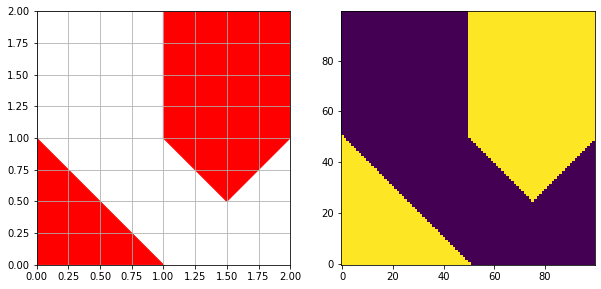

In [4]:
# Polygons to bitmap using opencv2
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.reshape((-1))

poly1 = np.array([
        [  1, 1],
        [1.5, 0.5],
        [  2, 1],
        [  2, 2],
        [  1, 2]])
poly2 = np.array([
        [0, 0],
        [1, 0],
        [0, 1]])

patch = matplotlib.patches.Polygon(poly1, fill=True, color='r')
axes[0].add_patch(patch)
patch = matplotlib.patches.Polygon(poly2, fill=True, color='r')
axes[0].add_patch(patch)
axes[0].set_xlim([0, 2])
axes[0].set_ylim([0, 2])
axes[0].set_aspect('equal')
axes[0].grid()

N = 100
image = np.zeros((N, N))
r_poly1 = ( (N / 2.)*poly1 ).astype(int).reshape((-1,1,2))
r_poly2 = ( (N / 2.)*poly2 ).astype(int).reshape((-1,1,2))
cv.fillPoly(image, [r_poly1, r_poly2], 1)
axes[1].imshow(image, origin='lower', interpolation='none')

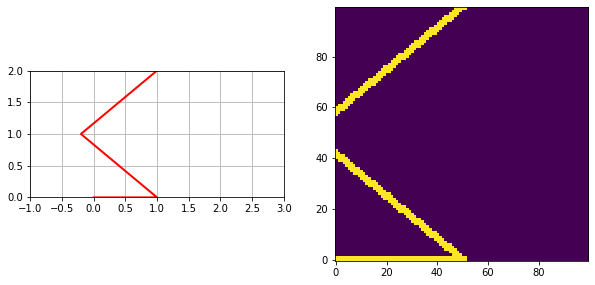

In [5]:
# Lines/polygons to bitmap using opencv2 with out of bounds
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.reshape((-1))

line1 = np.array([
        [0, 0],
        [1, 0],
        [-0.2, 1],
        [1, 2]])

axes[0].plot(line1.T[0], line1.T[1], 'r-', linewidth=2)
axes[0].set_xlim([-1, 3])
axes[0].set_ylim([0, 2])
axes[0].set_aspect('equal')
axes[0].grid()

N = 100
image = np.zeros((N, N))
r_line1 = ( (N / 2.)*line1 ).astype(int).reshape((-1,1,2))
cv.polylines(image, [r_line1], False, 1, thickness=2)
axes[1].imshow(image, origin='lower', interpolation='none')